Module 3a: Clustering Analysis using K-means,
Charles Pang, PSUPR Semester 1 2021

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from pyclustertend import hopkins
from yellowbrick.cluster import SilhouetteVisualizer

%matplotlib inline

In [7]:
df = pd.read_csv("BirthDeathRates.csv")
data = df.drop(["SN","Country"],axis=1)
cols = list(data) 

In [8]:
print("Summary Statistics:\n")
sumary = data.describe(percentiles=[])
#print(data.info())
print(np.transpose(np.round(sumary)))

Summary Statistics:

            count  mean   std   min   50%    max
Literacy     25.0  73.0  22.0  24.0  78.0  100.0
Baby Mort    25.0  53.0  36.0   7.0  52.0  126.0
Birth Rate   25.0  29.0  11.0  10.0  28.0   46.0
Death Rate   25.0   9.0   4.0   2.0   9.0   19.0


c:\users\aparg\anaconda3\envs\pr3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


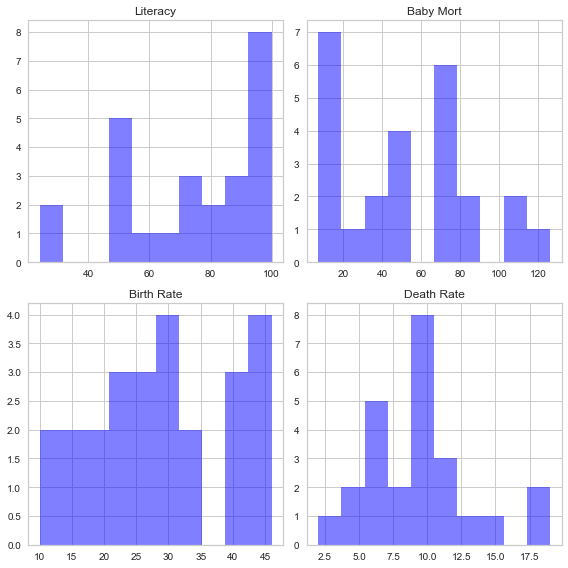

In [9]:
data.hist(alpha=0.5, bins = 10, color='blue', figsize=(8, 8))
plt.tight_layout()
plt.show()

c:\users\aparg\anaconda3\envs\pr3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Literacy         AxesSubplot(0.125,0.657941;0.168478x0.222059)
Baby Mort     AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Birth Rate    AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Death Rate    AxesSubplot(0.731522,0.657941;0.168478x0.222059)
dtype: object

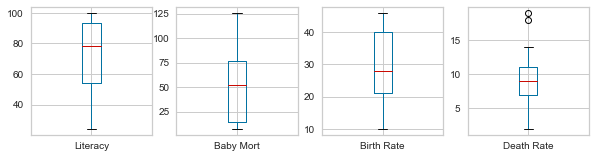

In [10]:
# Box Plot
# Helps in interpreting whether our clusters are going to be good or not.
# For Clustering, we need to make sure that the distribution within a feature is spread out (high variance).
data.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(10,8))

In [11]:
# Hopkins Test - Assess the clustering tendency of a dataset
# According to Hopkins Test original formula   --> H = 0 (uniform data), H = 0.5 (random data) , H = 1 (highly clustered data)
# Hopkins Test implementation in pyclustertend --> H = 0 (highly clustered data), H = 0.5 (random data) , H = 1 (uniform data)


print('\n',' Hopkins Test: ', hopkins(data,10),'\n')


  Hopkins Test:  0.33923003051019374 



In [12]:
# Do a scree plot for various k values
clusters  = 8

# Sum of Squared Errors (Avg within cluster distance to centroid)
sse = {} 

# Overall Silhouette Coefficient (assesses both internal cohesion and external separation).
mean_silhouette = {}

for i in range(2, clusters):
    kmeans = KMeans(n_clusters=i,init="k-means++", n_init = 10, max_iter= 100)
    kmeans.fit(data)
    y = kmeans.predict(data)
    
    # Clustering Evaluation (Decide value of K)
    
    sse[i] = kmeans.inertia_
    
    mean_silhouette[i] = silhouette_score(data,y)

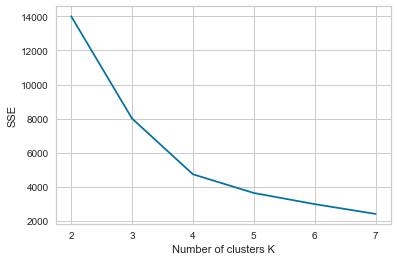

In [13]:
# Choose elbow point in plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters K")
plt.ylabel("SSE")
plt.show()

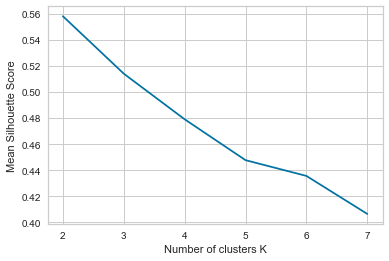

In [20]:
# Choose K value with Score>0.4
plt.figure()
plt.plot(list(mean_silhouette.keys()), list(mean_silhouette.values()))
plt.xlabel("Number of clusters K")
plt.ylabel("Mean Silhouette Score")
plt.show()

In [16]:
# Run the K-means on best K value
clusters  = 4
kmeans = KMeans(n_clusters=clusters, init="k-means++", n_init = 10, max_iter= 100)
kmeans.fit(data) 
    
print("No Clusters =", clusters," Silhouette = ",silhouette_score(data,kmeans.predict(data)))

No Clusters = 4  Silhouette =  0.47912606087760806


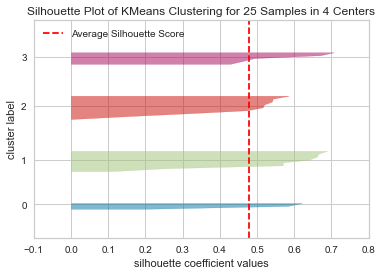

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 25 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
# Cluster Silhouette Plot
'''
The Cluster Silhouette Plot displays the silhouette coefficient for each sample on a per-cluster basis, 
visualizing which clusters are dense and which are not. 
This is particularly useful for determining cluster imbalance, or for selecting a value for K by comparing multiple visualizers.
The Silhouette Score for each cluster must be above Mean Silhouette Score line.
'''
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(data)
visualizer.show()

In [18]:
centroids = pd.DataFrame(kmeans.cluster_centers_.T, index = cols)
print(centroids)
print()

                     0        1          2     3
Literacy     33.666667  92.6250  62.111111  87.2
Baby Mort   115.000000  11.8625  73.544444  44.2
Birth Rate   43.666667  18.5000  36.000000  24.4
Death Rate   15.333333   7.2500  10.777778   6.6



In [19]:
df['Cluster'] = kmeans.predict(data)
df.sort_values(by=['Cluster'], inplace=True)
print(df[['Cluster','Country']])

    Cluster       Country
20        0       Somalia
8         0      Ethiopia
10        0         Haiti
0         1     Argentina
1         1     Australia
22        1           USA
4         1         Chile
6         1    Costa Rica
9         1        Greece
15        1        Kuwait
13        1         Italy
18        2       Nigeria
17        2     Nicaragua
14        2         Kenya
12        2     Indonesia
11        2         India
7         2         Egypt
3         2      Cameroon
2         2       Bolivia
24        2        Zambia
16        3        Mexico
5         3         China
19        3  Phillippines
21        3      Thailand
23        3       Vietnam
